# Name : Gaurav Mathur
# Roll Number : D21014
# Name : Kiran GJ
# Roll Number : D21017

# What  is the problem?



Here we are given data sets for training and testing.Since the dataset Mainly Revolves on the Housing Prices along with certain attributes for prediction in the dataset.The Training set consists of 9761 records. The task is to find the best possible fitting model either in linear regression using cv score and on the Decision Tree  which has highest accuracy score from the dataset.Multiple linear Regression models and Decision Trees are built for the better accuracy.


In [ ]:
# Importing the libraries Necessary for the datasets and visualisation

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

# 1 Initial Hypothesis :
    More the number of bedrooms  Higher the price
    More sqft_living Area Higher the price
    if the waterfront is there Higher the price
    More the  basement area  size higher the price
    More the number of bathrooms More would be the price of a House 
    More the sqft_livin15 more will be the  price
    More the sqft_lot15 there will be increase in the price


In [ ]:
# Loading the train data set for the analysis

In [2]:
train = pd.read_csv('traindata.csv')


In [3]:
train.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


# 2 EDA 

In [180]:
# These functions are used for finding the length,breath & Overall Dimension of the data set. 
train.size,train.shape

(302591, (9761, 31))

In [4]:
# This function helps in finding the overview of the data set  
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
##These columns are  redundant for the modelling as these do not rence to the data set
train = train.drop(columns =['id','date','lat','long'])

In [6]:
train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
1,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,4760,101930
2,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,1330,6000
3,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,1780,12697
4,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,1370,10208


In [7]:
##Checking the null values.Since the Null values  affect the perfromance of a linear regression model   
train.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
# Unique function
train.bedrooms.unique()

array([ 4,  2,  3,  5,  6,  1,  7,  8,  9,  0, 11, 10, 33], dtype=int64)

In [9]:
#Mean price variation using the number of bedrooms :
train.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.300777,0.527512,0.705044,0.094146,0.262955,0.274953,0.399711,0.044754,0.665594,0.611450,0.322369,0.051737,0.120439,-0.055619,0.584829,0.077960
bedrooms,0.300777,1.000000,0.506070,0.560989,0.028895,0.181042,-0.006803,0.079863,0.036135,0.342305,0.462514,0.301829,0.155102,0.018625,-0.148339,0.376457,0.018149
bathrooms,0.527512,0.506070,1.000000,0.758930,0.079435,0.501899,0.061483,0.182988,-0.115382,0.660925,0.692911,0.281433,0.499589,0.044756,-0.201454,0.566076,0.068722
sqft_living,0.705044,0.560989,0.758930,1.000000,0.162786,0.366219,0.097203,0.285735,-0.047938,0.764819,0.878989,0.435069,0.322723,0.043627,-0.203761,0.758081,0.163545
sqft_lot,0.094146,0.028895,0.079435,0.162786,1.000000,-0.003543,0.029420,0.099221,-0.008722,0.115611,0.180913,-0.000601,0.054043,0.001219,-0.126091,0.145285,0.719922
floors,0.262955,0.181042,0.501899,0.366219,-0.003543,1.000000,0.022443,0.031938,-0.265390,0.461545,0.534801,-0.242675,0.481926,0.013655,-0.064479,0.289238,-0.013269
waterfront,0.274953,-0.006803,0.061483,0.097203,0.029420,0.022443,1.000000,0.402725,0.024030,0.088039,0.064297,0.082214,-0.027010,0.101684,0.023656,0.097196,0.028499
view,0.399711,0.079863,0.182988,0.285735,0.099221,0.031938,0.402725,1.000000,0.059969,0.258123,0.170286,0.277021,-0.056361,0.109750,0.075834,0.292435,0.079904
condition,0.044754,0.036135,-0.115382,-0.047938,-0.008722,-0.265390,0.024030,0.059969,1.000000,-0.133313,-0.153713,0.189828,-0.357396,-0.055525,0.003410,-0.080423,0.002253
grade,0.665594,0.342305,0.660925,0.764819,0.115611,0.461545,0.088039,0.258123,-0.133313,1.000000,0.756226,0.174216,0.447817,0.013053,-0.187340,0.717835,0.118618


<AxesSubplot:>

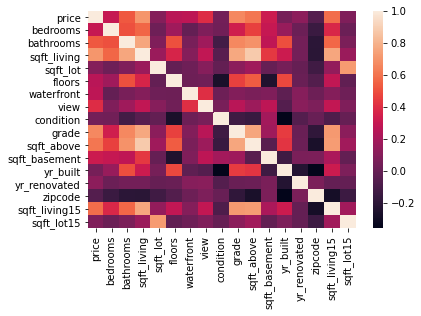

In [490]:
# Establishing the heat map to represent the 
sns.heatmap(train.corr())

# Testing the hypothesis : 
## 1. More bedroom more price.

In [429]:
# This gives the comparison of  More the bedrooms More will be the price to a certain extent 
round(pd.DataFrame(train['price'].groupby([train.bedrooms]).mean()),2)

,price
bedrooms,
0,420833.33
1,317474.78
2,403004.51
3,465111.26
4,640009.37
5,786621.75
6,910751.59
7,888715.29
8,1318714.29


In [197]:
## As we can see from the above table, that the prices increased at first then decreased after 6 bedrooms.

## 2 Sqft bedrooms vs price 

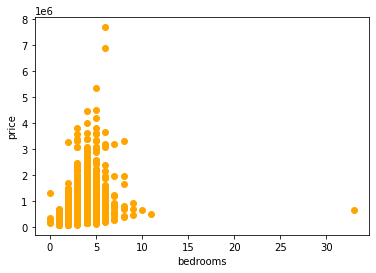

In [430]:
## EDA visual representing for finding the relationship between x -axis 
x = train.bedrooms
y = train.price
plt.scatter(x,y,c = 'orange')
plt.xlabel('bedrooms')
plt.ylabel('price')

plt.show()
#Here from the  visual we can interpret that as the number of bedrooms increases the price rate increases to certain extent.

## 3 More Sqft_living more prices

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

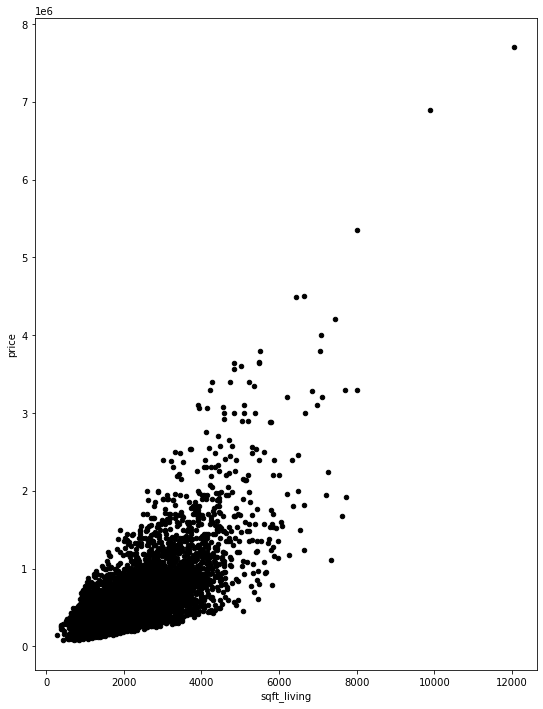

In [56]:
train.plot(kind = 'scatter',x = 'sqft_living',y = 'price',color = 'black',figsize = (9,12))

In [58]:
train.loc[(train.bedrooms >2),['price']].mean()

price    566139.466833
dtype: float64

In [57]:
train.loc[(train.bedrooms <2),['price']].mean()

price    324072.138298
dtype: float64

In [32]:
##Very difficult to say anything on it. But looks like the prices increase when the sqft_living increases.

## 4. If WaterFront is there, More price(Hypothesis)

# cross - check on our Hypothesis

In [59]:
train.loc[(train.waterfront == 0),['price']].mean()

price    533222.815683
dtype: float64

In [60]:
round(train.loc[(train.waterfront == 1),['price']].mean(),2)

price    1677256.1
dtype: float64

### Here we can say that, if waterfront is there, then price is more.

## 5. If sqft_basement then more price.

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

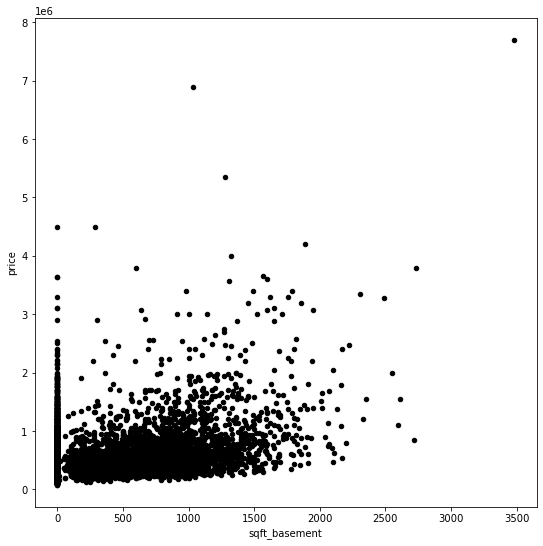

In [61]:
train.plot(kind = 'scatter',x = 'sqft_basement',y = 'price',color = 'black',figsize = (9,9))

In [ ]:
# Cant conclude the influence of the sqaure basement on the pricing since linearity is not not obseerved 

## 6. Floors vs Price

In [62]:
train.floors.unique()

array([1. , 1.5, 2. , 3. , 2.5, 3.5])

In [63]:
#Let's see how the price varies using floors.
train.loc[(train.floors == 1.0),['price']].mean()

price    439697.509255
dtype: float64

In [64]:
x = list(train.floors.unique())
x

[1.0, 1.5, 2.0, 3.0, 2.5, 3.5]

In [65]:
for i in x:
    print("The floor count is",i)
    print(train.loc[(train.floors == i),['price']].mean())


The floor count is 1.0
price    439697.509255
dtype: float64
The floor count is 1.5
price    576845.769319
dtype: float64
The floor count is 2.0
price    656132.304862
dtype: float64
The floor count is 3.0
price    578104.44898
dtype: float64
The floor count is 2.5
price    1.168111e+06
dtype: float64
The floor count is 3.5
price    1912500.0
dtype: float64


In [3]:
##As we can see, the trend says that more the number of floors, more the price.

## 7. sqft_lot vs Price

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

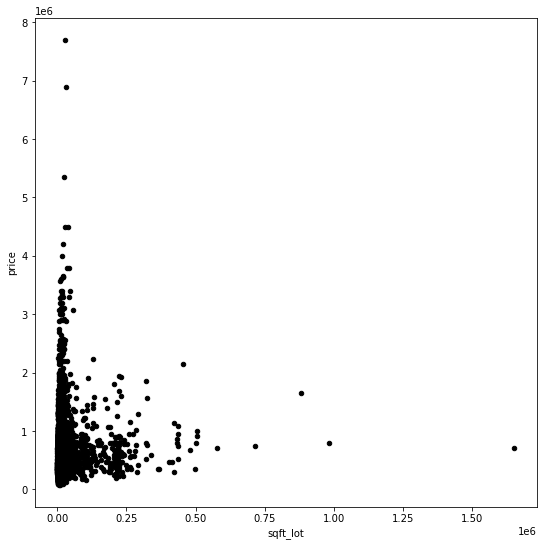

In [66]:
train.plot(kind = 'scatter',x = 'sqft_lot',y = 'price',color = 'black',figsize = (9,9))

### In general, Its surprising to see that as the Sqft lot increases there is no change in the price observed.

In [67]:
train.sqft_lot.mean()

15215.26062903391

In [68]:
## In general,Its surprising to see that as the Sqft lot increases there is no change in the price observed.
train.loc[(train.sqft_lot<15215),['price']].mean()

price    510102.375792
dtype: float64

In [69]:
## In general,Its surprising to see that as the Sqft lot increases there is no change in the price observed.
train.loc[(train.sqft_lot>15215),['price']].mean()

price    738309.049286
dtype: float64

In [70]:
train.sqft_lot.median()

7642.0

In [71]:
train.loc[(train.sqft_lot<2000),['price']].mean()

price    433992.943434
dtype: float64

## 8. Bathrooms vs price:

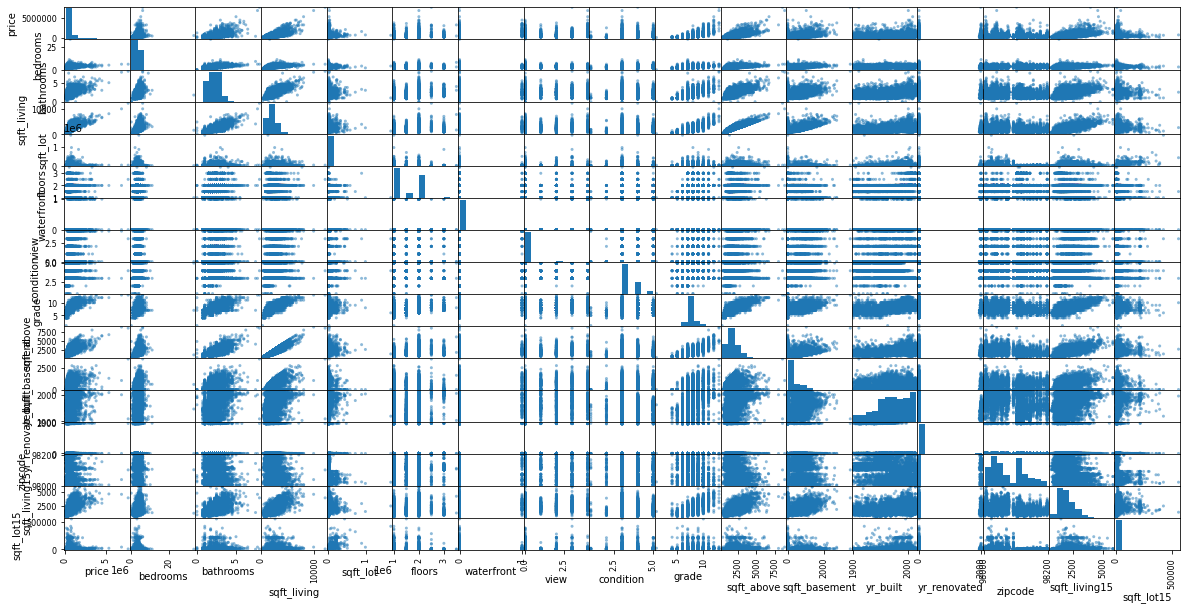

In [72]:
#Pairwise Scatterplot
#Using alpha we can....................
from pandas.plotting import scatter_matrix
scatter_matrix(train,alpha = 0.5,figsize = (20,10),diagonal = 'hist')
plt.show()

# 9 sqft living15 vs Price 

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

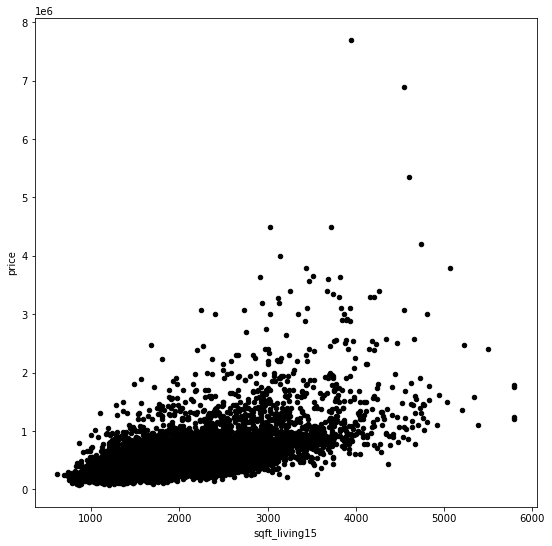

In [73]:
train.plot(kind = 'scatter',x = 'sqft_living15',y = 'price',color = 'black',figsize = (9,9))

In [58]:
#Here from the above we can conclude that the sqft_living15 increases linearly with the price increasing.

## 10 sqft lot15 vs Price 

<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

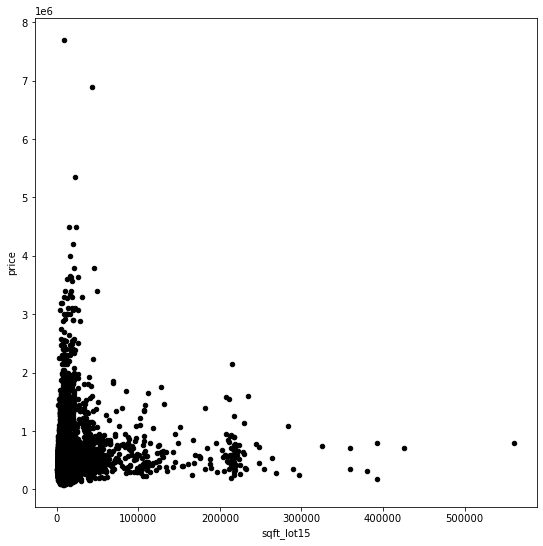

In [74]:
train.plot(kind = 'scatter',x = 'sqft_lot15',y = 'price',color = 'black',figsize = (9,9))

## 11  Grade vs Price

<AxesSubplot:xlabel='grade', ylabel='price'>

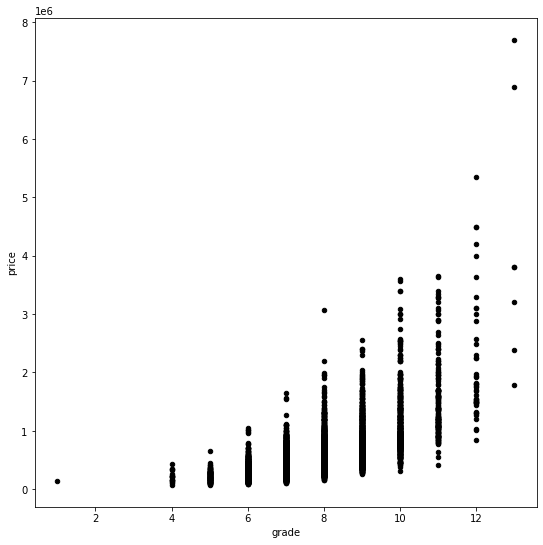

In [63]:
train.plot(kind = 'scatter',x = 'grade',y = 'price',color = 'black',figsize = (9,9))

## 12   sqft_lot15 vs price 

<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

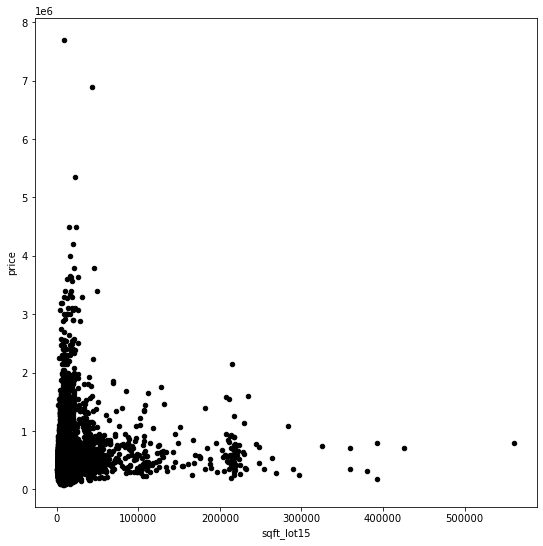

In [66]:
train.plot(kind = 'scatter',x = 'sqft_lot15',y = 'price',color = 'black',figsize = (9,9))

In [68]:
# From the above graph its clear that the sqft_lot15 isnt linearly related with the price 

## 13 sqft_above vs price 

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

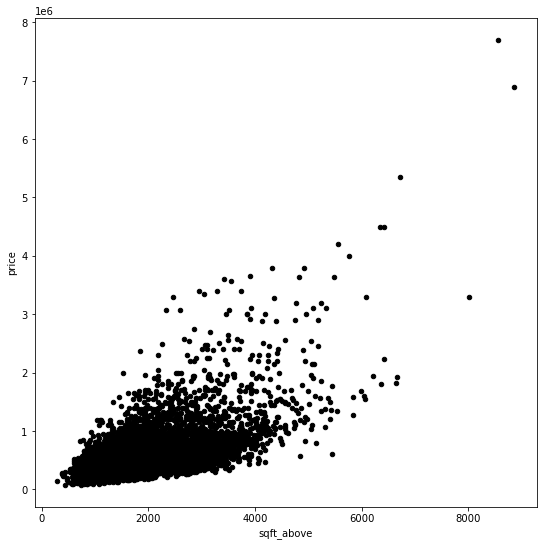

In [146]:
train.plot(kind = 'scatter',x = 'sqft_above',y = 'price',color = 'black',figsize = (9,9))

## 14 condition vs price 

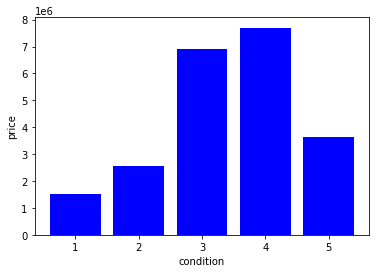

In [75]:
x = train.condition
y = train.price 
plt.bar(x,y,color = 'blue')
plt.xlabel('condition')
plt.ylabel('price')
plt.show()
# Here from the Bar graph it can be observed that  as the condition of the property increases the price also increases to  certain extent

In [60]:
# Here from  the above we can conclude that the sqft lot15 doesnt represent linearity with the price.


# 3 Initial model fitting step 

# Linear Regression Model 1 

In [10]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold    

x =train[['condition','grade','bedrooms']]
y = train[['price']] 
k = 10
kf = KFold(n_splits=k,random_state=1,shuffle=True)
model = LinearRegression()
model.fit(x,y)
 
result = cross_val_score(model , x, y,scoring='r2', cv = kf)
 
print("The average acccuracy score is: {}".format(result.mean()))



The average acccuracy score is: 0.466302802428373


# Linear Regession Model 2 

In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold    

x =train[['condition','grade','bathrooms','sqft_living','waterfront']]
y = train[['price']] 
k = 10
kf = KFold(n_splits=k,random_state=1,shuffle=True)
model = LinearRegression()
 
result = cross_val_score(model , x, y,scoring='r2', cv = kf)
 
print("The average acccuracy score is: {}".format(result.mean()))

The average acccuracy score is: 0.5845315501215423


# Linear Regression Model 3.

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold    

x =train[['bathrooms','sqft_living','floors','waterfront','view','condition','grade','sqft_above']]
y =train[['price']] 
k = 10
kf = KFold(n_splits=k,random_state=1,shuffle=True)
model = LinearRegression()
 
result = cross_val_score(model , x, y,scoring='r2', cv = kf)
 
print("The average accuracy score is {}".format(result.mean()))

The average accuracy score is 0.5976691358574968


# Linear Regression Model 4

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold    
# Here are the set of predictors  we  are using to best fit the model for evaluation. 
x =train[['bathrooms','sqft_living','floors','waterfront','view','condition','grade','sqft_above','zipcode']]
y =train[['price']] 
k = 10
kf = KFold(n_splits=k,random_state=1,shuffle=True)
model = LinearRegression()
model.fit(x,y)
result =1 - (1-model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)
print("The average accuracy score is",result)

The average accuracy score is 0.6074462356523032


# 4 Feature Engineering 

 Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling.

 ## Categorical Encoding 

In [517]:
train.dtypes
# Observong the dtypes in Categorical Encoding

price                 float64
bedrooms                int64
bathrooms             float64
sqft_living             int64
sqft_lot                int64
floors                float64
waterfront              int64
view                    int64
condition               int64
grade                   int64
sqft_above              int64
sqft_basement           int64
yr_built                int64
yr_renovated            int64
zipcode                 int64
sqft_living15           int64
sqft_lot15              int64
sqrt_bathrooms        float64
sqrt_sqft_living      float64
sqrt_floors           float64
sqrt_waterfront       float64
sqrt_view             float64
sqrt_condition        float64
sqrt_grade            float64
sqrt_sqft_above       float64
sqrt_basement         float64
sqrt_yr_built         float64
sqrt_yr_renovated     float64
sqrt_zipcode          float64
sqrt_sqft_living15    float64
sqrt_sqft_lot15       float64
dtype: object

# Note: Here from the above data it can be represented all the data here is Nominal and  no data is Categorical. So  Encoding  is not Required. 

In [394]:
# Since all the variables here are nominal doing categorical encoding doesnt makes any differen

In [16]:
# Standardization of data.
train.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

# standardization 

In [17]:
# Library used for standardization.
from sklearn import preprocessing
#Selecting the independent  Variable
x_train = train[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','sqft_living15','sqft_lot15']]
X_data = x_train
#Standardization of dependent variables
x = preprocessing.scale(X_data)
print(x)

[[ 0.6496828   1.14070136 -0.13669264 ...  1.09415159 -0.92008093
  -0.29508585]
 [ 0.6496828   3.07885786  3.59518668 ... -0.46597332  4.026906
   3.36030793]
 [-1.43224557 -1.44350729 -0.99955491 ...  0.69942119 -0.96373081
  -0.25737416]
 ...
 [ 0.6496828   1.78675353  1.53510301 ...  1.09415159  0.08386642
  -0.24983182]
 [-1.43224557 -1.76653337 -1.15055581 ...  1.24452508 -1.41477962
  -0.40795692]
 [-1.43224557 -1.76653337 -1.15055581 ...  1.24452508 -1.41477962
  -0.43246952]]


In [18]:
x

array([[ 0.6496828 ,  1.14070136, -0.13669264, ...,  1.09415159,
        -0.92008093, -0.29508585],
       [ 0.6496828 ,  3.07885786,  3.59518668, ..., -0.46597332,
         4.026906  ,  3.36030793],
       [-1.43224557, -1.44350729, -0.99955491, ...,  0.69942119,
        -0.96373081, -0.25737416],
       ...,
       [ 0.6496828 ,  1.78675353,  1.53510301, ...,  1.09415159,
         0.08386642, -0.24983182],
       [-1.43224557, -1.76653337, -1.15055581, ...,  1.24452508,
        -1.41477962, -0.40795692],
       [-1.43224557, -1.76653337, -1.15055581, ...,  1.24452508,
        -1.41477962, -0.43246952]])

In [19]:
type(x)

numpy.ndarray

In [20]:
x = pd.DataFrame(x)

In [21]:
type(x)

pandas.core.frame.DataFrame

# sqrt of train data  

In [22]:
# To make the Dataset normal we are applying sqrt for the variabbles desired for the better modelling 
train['sqrt_bathrooms'] = np.sqrt(train['bathrooms'])
train['sqrt_sqft_living'] = np.sqrt(train['sqft_living'])
train['sqrt_floors'] = np.sqrt(train['floors'])
train['sqrt_waterfront'] = np.sqrt(train['waterfront'])
train['sqrt_view'] = np.sqrt(train['view'])
train['sqrt_condition'] = np.sqrt(train['condition'])
train['sqrt_grade'] = np.sqrt(train['grade'])
train['sqrt_sqft_above'] = np.sqrt(train['sqft_above'])
train['sqrt_basement']=np.sqrt(train['sqft_basement'])
train['sqrt_yr_built']=np.sqrt(train['yr_built'])
train['sqrt_yr_renovated']=np.sqrt(train['yr_renovated'])
train['sqrt_zipcode']=np.sqrt(train['zipcode'])
train['sqrt_sqft_living15']=np.sqrt(train['sqft_living15'])
train['sqrt_sqft_lot15']=np.sqrt(train['sqft_lot15'])
train['sqrt_waterfront'] = np.sqrt(train['waterfront'])
train['sqrt_view'] = np.sqrt(train['view'])


In [503]:
train

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,sqrt_bathrooms,sqrt_sqft_living,sqrt_floors,sqrt_waterfront,sqrt_view,sqrt_condition,sqrt_grade,sqrt_sqft_above,sqrt_basement,sqrt_yr_built,sqrt_yr_renovated,sqrt_zipcode,sqrt_sqft_living15,sqrt_sqft_lot15
0,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,1.732051,44.271887,1.000000,0.0,0.0,2.236068,2.645751,32.403703,30.166206,44.328321,0.0,313.266660,36.878178,70.710678
1,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,4760,101930,2.121320,73.620649,1.000000,0.0,0.0,1.732051,3.316625,62.369865,39.115214,44.732538,0.0,313.134157,68.992753,319.264780
2,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,1330,6000,1.000000,34.058773,1.000000,0.0,0.0,2.000000,2.645751,29.325757,17.320508,44.068129,0.0,313.233140,36.469165,77.459667
3,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,1780,12697,1.000000,37.815341,1.224745,0.0,0.0,2.000000,2.645751,37.815341,0.000000,43.897608,0.0,313.094235,42.190046,112.680966
4,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,1370,10208,1.322876,37.013511,1.000000,0.0,0.0,2.000000,2.645751,37.013511,0.000000,44.463468,0.0,313.167687,37.013511,101.034648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,1400,1230,1.414214,38.600518,1.732051,0.0,0.0,1.732051,2.828427,38.600518,0.000000,44.877611,0.0,313.279428,37.416574,35.071356
9757,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,2520,6023,1.581139,50.199602,1.414214,0.0,0.0,1.732051,3.000000,50.199602,0.000000,44.877611,0.0,313.138947,50.199602,77.607989
9758,1010000.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,2050,6200,1.870829,59.245253,1.414214,0.0,0.0,1.732051,3.000000,50.990195,30.166206,44.821870,0.0,313.266660,45.276926,78.740079
9759,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,0.866025,31.937439,1.414214,0.0,0.0,1.732051,2.645751,31.937439,0.000000,44.821870,0.0,313.279428,31.937439,44.799554


In [24]:
type(train)

pandas.core.frame.DataFrame

# Linear regression  Model 5 

In [26]:
# Importing the models necessary for regression
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold    
# Here are the set of predictors  we  are using to best fit the model for evaluation.
#x is the predictor variable
x =train[['sqrt_bathrooms','sqrt_sqft_living','sqrt_floors','sqrt_waterfront','sqrt_view','sqrt_condition','sqrt_grade','sqrt_sqft_above','sqrt_basement','sqrt_yr_built','sqrt_yr_renovated','sqrt_zipcode','sqrt_sqft_living15','sqrt_sqft_lot15','sqrt_waterfront','sqrt_view']]
y =train[['price']] # target varaible 
k = 10
kf = KFold(n_splits=k,random_state=1,shuffle=True)
model = LinearRegression()
model.fit(x,y)
result =cross_val_score(model , x, y,scoring='r2', cv = kf)
print("The average accuracy score is",result.mean())

The average accuracy score is 0.6175678620453582


In [ ]:
# Here after applying the standardization  the previous accuracy score was 0.60 with the same predictor variables and after applying feature engineering there isnt a much difference in the model obtained. 

#   5 Model fitting( Forward selection or Backward Elimination) 

# Forward selection
## This  type of  selection can be  particularly used to select the important features in the dataset

In [27]:
# In the Forward selection method all the variables are selected one after the other in the series.For each value added we obtain
#For each value added we obtain a different score till the score starts to drop at on  point. That represents the perfect predictor
# Variables
!pip install mlxtend 

In [ ]:
# Importing the libraries and functions for the  Model selection Methods 

In [28]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [29]:
# calling the linear regression model
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=16, forward=True, verbose=2, scoring='r2')

In [30]:
x =train[['sqrt_bathrooms','sqrt_sqft_living','sqrt_floors','sqrt_waterfront','sqrt_view','sqrt_condition','sqrt_grade','sqrt_sqft_above','sqrt_basement','sqrt_yr_built','sqrt_yr_renovated','sqrt_zipcode','sqrt_sqft_living15','sqrt_sqft_lot15','sqrt_waterfront','sqrt_view']]
y =train[['price']]
sfs1 = sfs1.fit(x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.5s finished

[2021-11-07 23:19:40] Features: 1/16 -- score: 0.43557939662686673[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.5s finished

[2021-11-07 23:19:40] Features: 2/16 -- score: 0.4865393685300198[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished

[2021-11-07 23:19:41] Features: 3/16 -- score: 0.5585241748134349[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

In [ ]:
# Here from the above we can conclude that the adding more number of feauture after  10  will not create much change in the accuracy score 

#  Here in the above selection we can observe that the score was maximum  at 11th feauture and  again started to drop for the preceeding one. So it represents the best possible score for the  above model.

In [31]:
# Here in the above selection methods we can say that  for the sixth predictor varaible we got the highest score at peak then it 
# started to decline 

In [32]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['sqrt_bathrooms', 'sqrt_sqft_living', 'sqrt_floors', 'sqrt_waterfront', 'sqrt_view', 'sqrt_condition', 'sqrt_grade', 'sqrt_sqft_above', 'sqrt_basement', 'sqrt_yr_built', 'sqrt_yr_renovated', 'sqrt_zipcode', 'sqrt_sqft_living15', 'sqrt_sqft_lot15', 'sqrt_waterfront', 'sqrt_view']


In [33]:
# Creating a new dataframe using the above variables and adding the target variable(price)
new_train = train[feat_names]

new_train['price'] = train['price']

# First five rows of the new data
new_train.head()

<ipython-input-33-9bb0a9f475cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train['price'] = train['price']


,sqrt_bathrooms,sqrt_sqft_living,sqrt_floors,sqrt_waterfront,sqrt_view,sqrt_condition,sqrt_grade,sqrt_sqft_above,sqrt_basement,sqrt_yr_built,sqrt_yr_renovated,sqrt_zipcode,sqrt_sqft_living15,sqrt_sqft_lot15,sqrt_waterfront,sqrt_view,price
0,1.732051,44.271887,1.000000,0.0,0.0,2.236068,2.645751,32.403703,30.166206,44.328321,0.0,313.266660,36.878178,70.710678,0.0,0.0,604000.0
1,2.121320,73.620649,1.000000,0.0,0.0,1.732051,3.316625,62.369865,39.115214,44.732538,0.0,313.134157,68.992753,319.264780,0.0,0.0,1230000.0
2,1.000000,34.058773,1.000000,0.0,0.0,2.000000,2.645751,29.325757,17.320508,44.068129,0.0,313.233140,36.469165,77.459667,0.0,0.0,468000.0
3,1.000000,37.815341,1.224745,0.0,0.0,2.000000,2.645751,37.815341,0.000000,43.897608,0.0,313.094235,42.190046,112.680966,0.0,0.0,310000.0
4,1.322876,37.013511,1.000000,0.0,0.0,2.000000,2.645751,37.013511,0.000000,44.463468,0.0,313.167687,37.013511,101.034648,0.0,0.0,400000.0


In [34]:
new_train.shape

(9761, 17)

## Backward Selection
## This type of  selection can also be  particularly used to identify  the important features in the dataset

In [122]:
# Import the libraries and functions for the  Model selection Methods similarly as like forward selection methods almost all the steps 
# Would be same except very few 


# Decision tree 

# Importing the decision tree libraries

In [182]:
# importing the  libraries required for Decision tree modelling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix

# Decision Tree for Model 1 

In [124]:
# Comparison of the models obtained in the Linear Regression model  with the decision tree model.  

In [125]:
# The variables selected is similar as the linear regression model 1 
x =train[['condition','grade','bedrooms']]
y =train[['price']]

In [127]:
# The model 1 for Regression
model1 = DecisionTreeRegressor(random_state = 100,max_depth = 8,min_samples_leaf = 11)
model1.fit(x,y)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=11, random_state=100)

# Decision tree fitting 

In [129]:
y_pred = model1.predict(x)
y_pred

array([ 521551.94285714, 1391919.31818182,  434481.02469136, ...,
        731143.63927856,  395856.82170543,  395856.82170543])

In [44]:
from sklearn import tree

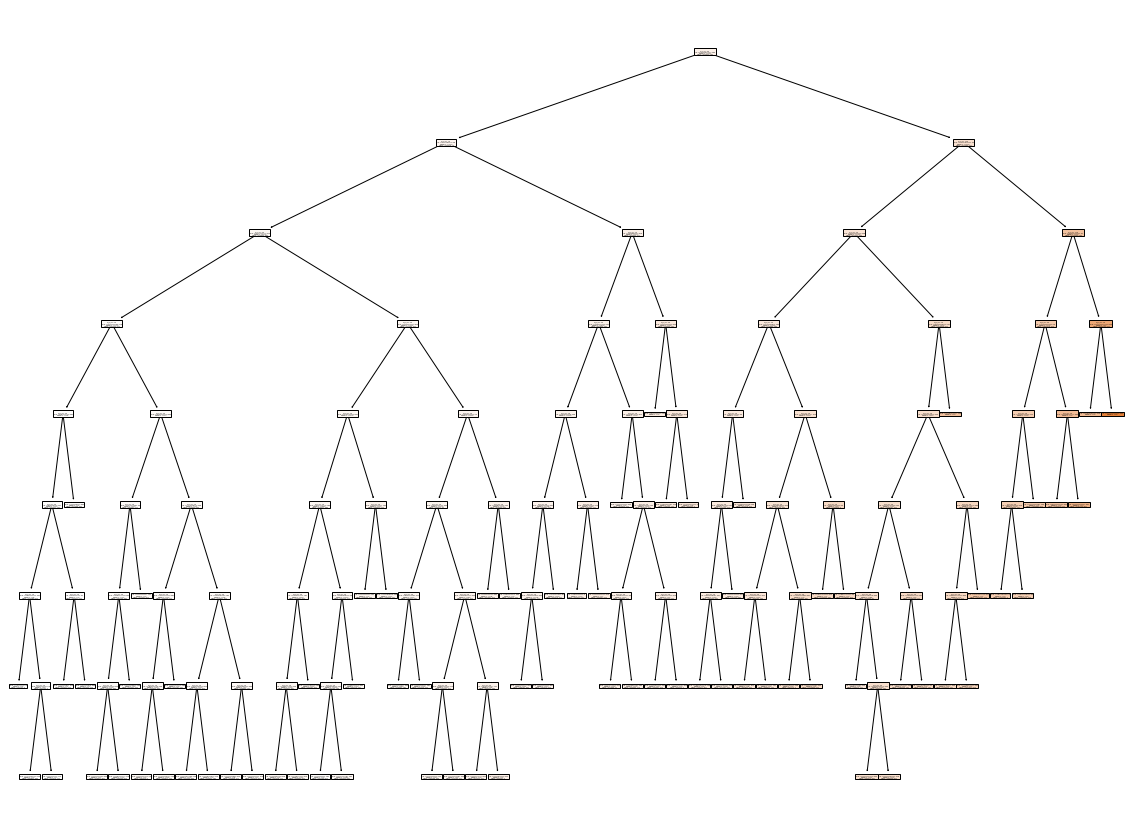

In [45]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (20,15))
_=tree.plot_tree(model1,filled = True )

In [130]:
#  Finding r2 value for the first model in decision tree
result =cross_val_score(model1 , x, y,scoring='r2')
print("The average accuracy score for this model is",result.mean())

The average accuracy score for this model is 0.5502611118588427


# Decision tree for Model 2

In [181]:
x =train[['condition','grade','bathrooms','sqft_living','waterfront']] # Predictor variables
y =train[['price']] # target variables

In [135]:
model2 = DecisionTreeRegressor(random_state = 100,max_depth = 8,min_samples_leaf = 11)
model2.fit(x,y)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=11, random_state=100)

In [136]:
y_pred = model2.predict(x)
y_pred

array([ 512732.14285714, 1624031.25      ,  352890.43311037, ...,
       1074208.33333333,  352890.43311037,  352890.43311037])

In [50]:
# library for plotting a tree 
from sklearn import tree

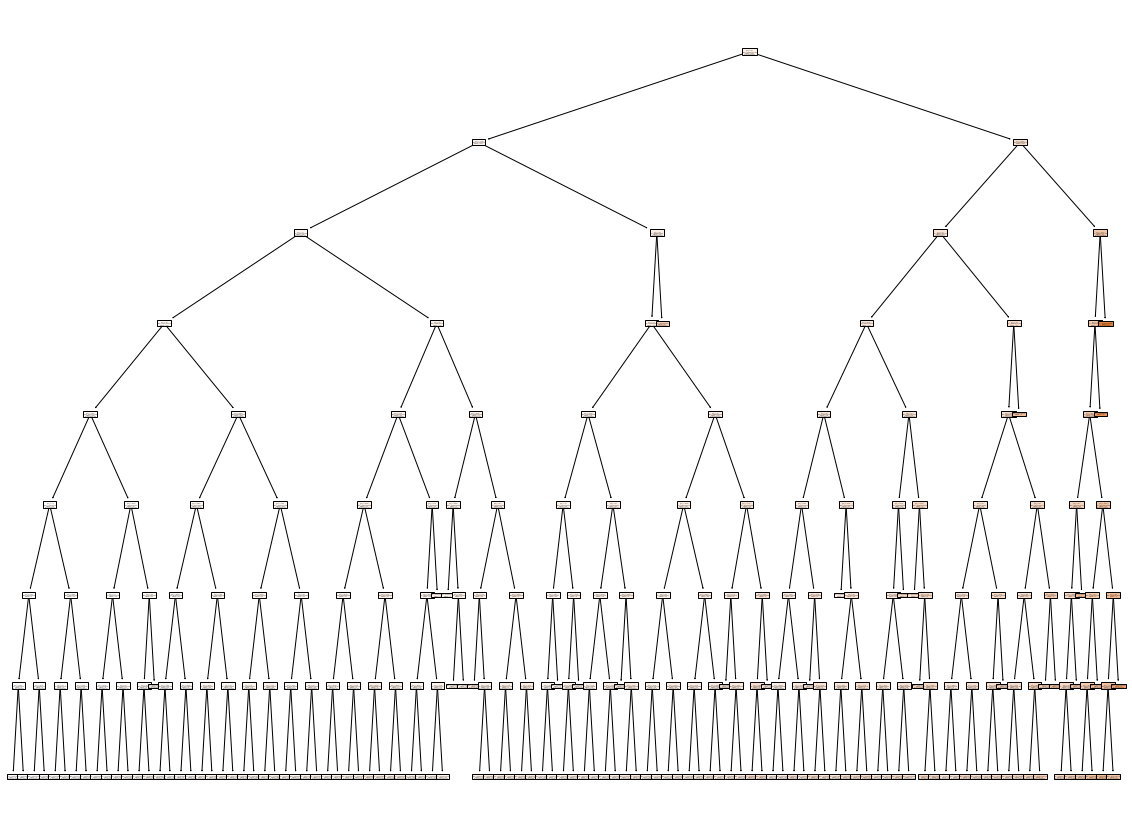

In [1024]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (20,15))
_=tree.plot_tree(model2,filled = True)

In [137]:
# Finding r2 value for the first model in decision tree
result =cross_val_score(model2 , x, y,scoring='r2')
print("The average accuracy score for this model is",result.mean())

The average accuracy score for this model is 0.5984198154793976


# Decision tree for Model 3 

In [52]:
x =train[['bathrooms','sqft_living','floors','waterfront','view','condition','grade','sqft_above']]
y =train[['price']] 

In [53]:
model3 = DecisionTreeRegressor(random_state = 100,max_depth = 8,min_samples_leaf = 11)
model3.fit(x,y)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=11, random_state=100)

In [54]:
y_pred = model3.predict(x)
y_pred

array([ 399189.67129136, 1978975.        ,  415029.046875  , ...,
        853134.48913043,  376799.12987013,  376799.12987013])

In [55]:
from sklearn import tree

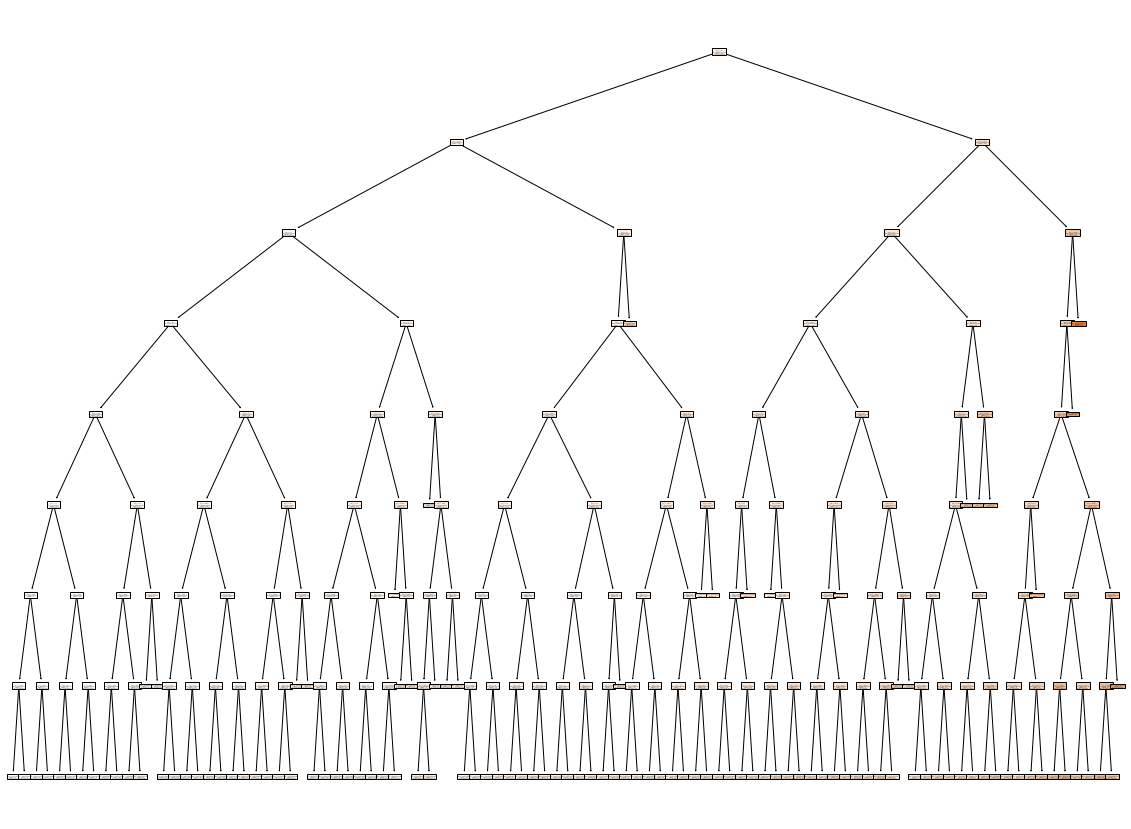

In [997]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (20,15))
_=tree.plot_tree(model3,filled = True )

In [56]:
#  Finding r2 value for the first model in decision tree
result =cross_val_score(model3 , x, y,scoring='r2')
print("The average accuracy score for this model is",result.mean())

The average accuracy score for this model is 0.5969598012212056


# Decision tree for Model 4 

In [107]:
# The same variables are being used for the model 4 in Linear model
x =train[['bathrooms','sqft_living','floors','waterfront','view','condition','grade','sqft_above','zipcode']]
y =train[['price']] 

In [108]:
model4 = DecisionTreeRegressor(random_state = 100,max_depth = 8,min_samples_leaf = 11)
model4.fit(x,y)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=11, random_state=100)

In [109]:
y_pred = model4.predict(x)
y_pred

array([ 400699.44864865, 1229965.11627907,  437648.16954023, ...,
        895411.76470588,  400699.44864865,  400699.44864865])

In [110]:
from sklearn import tree

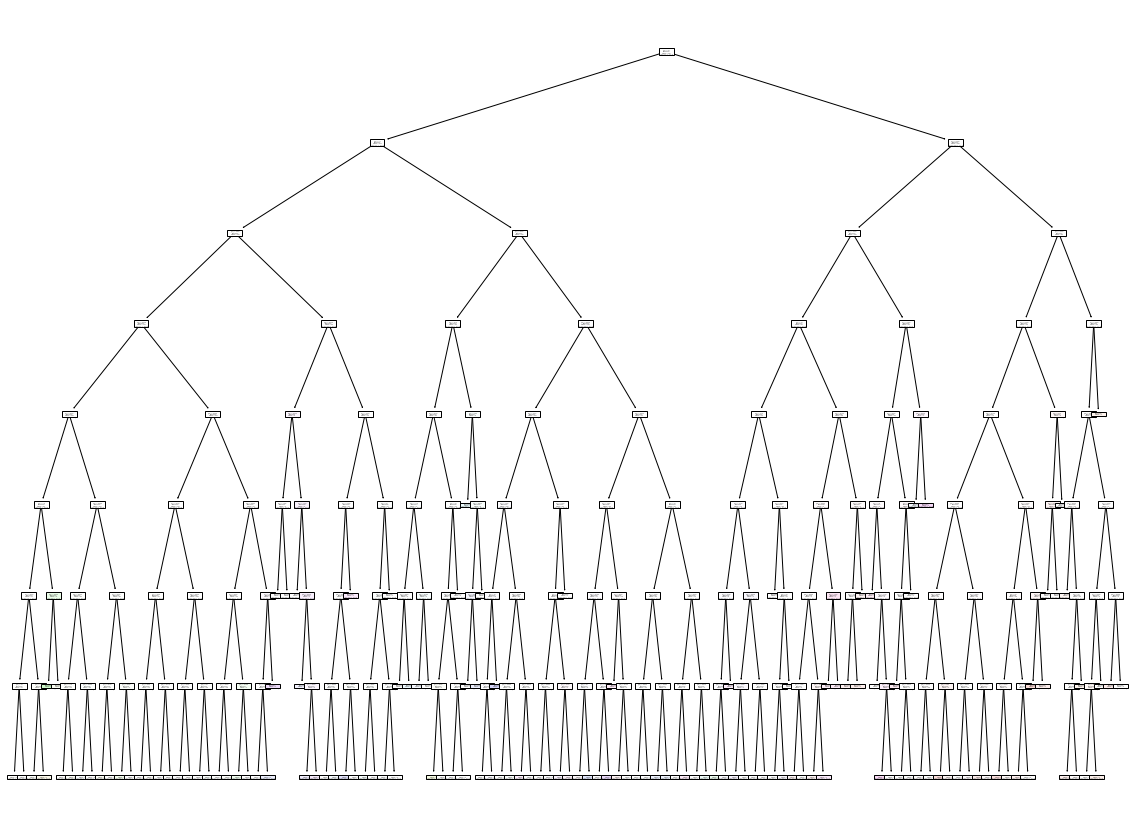

In [1004]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (20,15))
_=tree.plot_tree(model4,filled = True )

In [111]:
#  Finding r2 value for the first model in decision tree
result =cross_val_score(model4 , x, y,scoring='r2')
print("The average accuracy score for this model is",result.mean())

The average accuracy score for this model is 0.6626379484056832


# Decision tree for model 5

In [115]:
x =train[['sqrt_bathrooms','sqrt_sqft_living','sqrt_floors','sqrt_waterfront','sqrt_view','sqrt_condition','sqrt_grade','sqrt_sqft_above','sqrt_basement','sqrt_yr_built','sqrt_yr_renovated','sqrt_zipcode','sqrt_sqft_living15','sqrt_sqft_lot15','sqrt_waterfront','sqrt_view']]
y = train[['price']]

In [116]:
model5 = DecisionTreeRegressor(random_state = 100,max_depth = 8,min_samples_leaf = 11)
model5.fit(x,y)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=11, random_state=100)

In [117]:
y_pred = model5.predict(x)
y_pred

array([ 335098.59622256, 1439370.37037037,  514315.94181818, ...,
        850400.        ,  335098.59622256,  335098.59622256])

In [118]:
from sklearn import tree

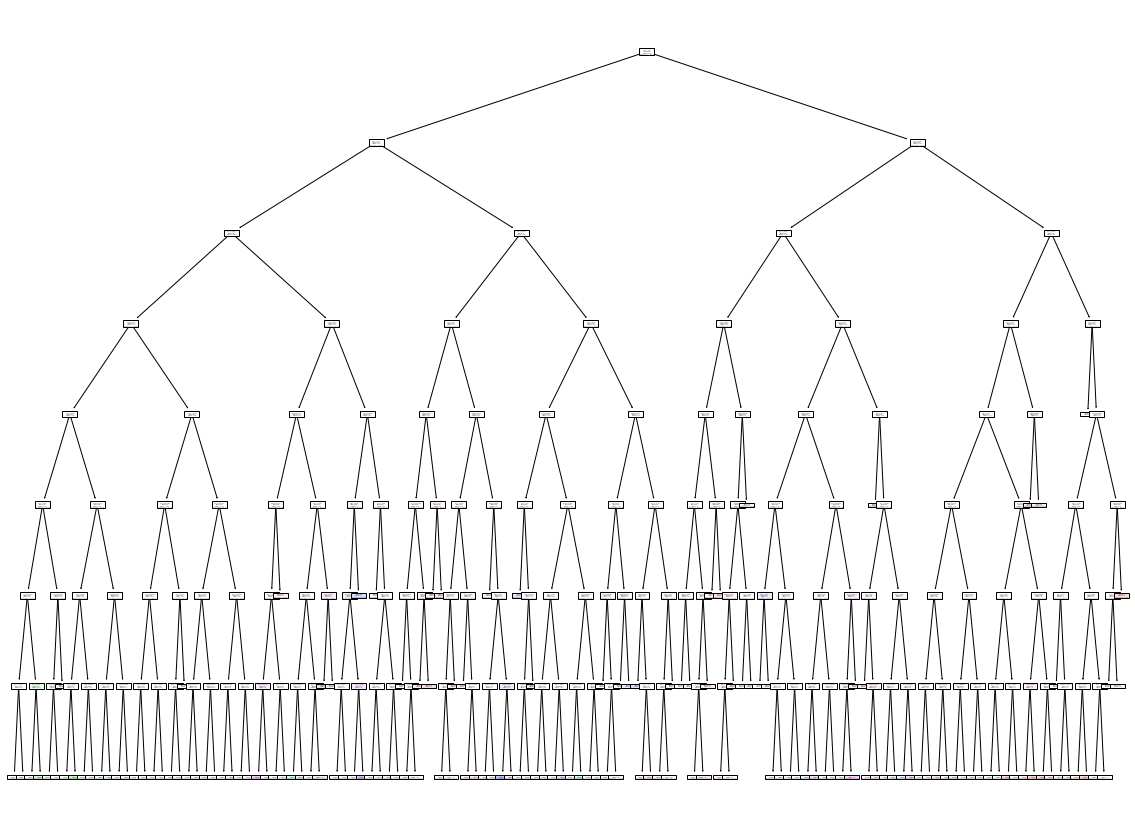

In [1011]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (20,15))
_=tree.plot_tree(clf_gini,filled = True )

In [120]:
#  Finding r2 value for the first model in decision tree
result =cross_val_score(model5 , x, y,scoring='r2',)
print("The average accuracy score for this model is",result.mean())

The average accuracy score for this model is 0.6619894214160377


# Here from the above we can conclude that the model 4 of the decision tree has the best  accuracy when compared to  other models so it is selected for the model testing with the test data  

In [138]:
# Reading the Test data 
import pandas as pd 
test= pd.read_csv('testdata.csv')

In [139]:
test

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
1,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,3,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850
2,16000397,20141205T000000,189000.0,2,1.00,1200,9850,1.0,0,0,4,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
3,461000390,20140624T000000,687500.0,4,1.75,2330,5000,1.5,0,0,4,7,1510,820,1929,0,98117,47.6823,-122.368,1460,5000
4,7895500070,20150213T000000,240000.0,4,1.00,1220,8075,1.0,0,0,2,7,890,330,1969,0,98001,47.3341,-122.282,1290,7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,6669080120,20141215T000000,405000.0,4,2.50,1980,5020,2.0,0,0,3,7,1980,0,2007,0,98056,47.5147,-122.190,1980,5064
2213,2855000110,20140808T000000,388000.0,3,2.50,2198,6222,2.0,0,2,3,8,2198,0,2010,0,98198,47.3906,-122.304,2198,7621
2214,3345700207,20150502T000000,608500.0,4,3.50,2850,5577,2.0,0,0,3,8,1950,900,2014,0,98056,47.5252,-122.192,2850,5708
2215,6056111067,20140707T000000,230000.0,3,1.75,1140,1201,2.0,0,0,3,8,1140,0,2014,0,98108,47.5637,-122.295,1210,1552


In [140]:
# Model 4 decision tree is  selected for testing the performance on the test data 

In [176]:
# Selecting the predictor variables 
x =test[['bathrooms','sqft_living','floors','waterfront','view','condition','grade','sqft_above','zipcode']]
y =test['price'] 

In [168]:
# Imposing Decision Tree Regressor for the Model
model4 = DecisionTreeRegressor(max_depth = 8,min_samples_leaf = 11)
model4.fit(x,y)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=11)

In [169]:
# y- pred represents the predicted values 
y_pred = model.predict(x)
y_pred

array([369507.74860335, 701587.5       , 193832.        , ...,
       704022.91666667, 435187.96296296, 491010.66666667])

In [170]:
y_pred.shape

(2217,)

In [171]:
# The mean of the Predicted values
y_pred.mean()

538724.2417681551

In [172]:
# The Error for this model is 
error = y-y_pred

In [175]:
# THe mean absolute error(mae) for the model is 
mae=(np.sum(np.abs(error))/len(y))
mae

119414.44196229288

# Conclusion

Nowadays the Real world business problems can be solved by Machine learning and datasets. So we have done implementation of numerous models on the Datasets. Here from the conclusion we can say that the More accurate model was found while fitting the dataset on the decision tree Model4. Hence the model is implemented on the test data set for the results  

# Below is the youtube link  on the Above model presentation

Youtube link: https://youtu.be/U1goBG-PtQI